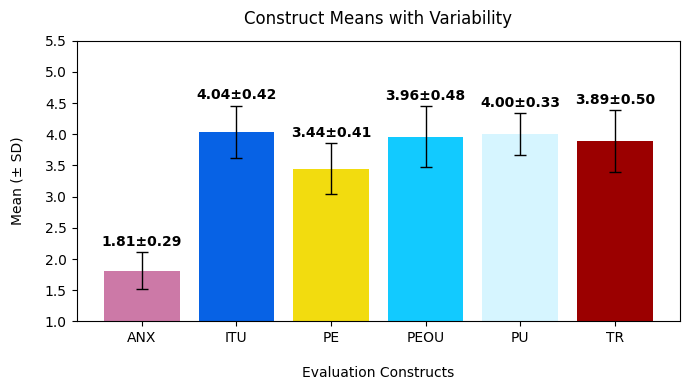

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

colors = ["#CC79A7", "#0762e5", "#f2dc0f", "#12caff", "#d6f5ff", "#9b0000"] 

FILE = "end_user_eval.xlsx"
FIG_DIR = "figs_eval"
os.makedirs(FIG_DIR, exist_ok=True)

df = pd.read_excel(FILE)
expected_cols = [
    "PU1","PU2","PU3",
    "PEOU1","PEOU2","PEOU3",
    "PE1","PE2","PE3",
    "TR1","TR2","TR3",
    "ANX1","ANX2","ANX3",
    "ITU1","ITU2","ITU3",
    "USE"
]
present = [c for c in expected_cols if c in df.columns]
data = df[present].apply(pd.to_numeric, errors="coerce")
data = data.dropna(how="all")

if "PE3" in data.columns:
    data["PE3"] = data["PE3"].apply(lambda x: 6 - x if pd.notna(x) else np.nan)

constructs = {}
if set(["PU1","PU2","PU3"]).intersection(data.columns):
    constructs["PU"] = data[["PU1","PU2","PU3"]].mean(axis=1)
if set(["PEOU1","PEOU2","PEOU3"]).intersection(data.columns):
    constructs["PEOU"] = data[["PEOU1","PEOU2","PEOU3"]].mean(axis=1)
if set(["PE1","PE2","PE3"]).intersection(data.columns):
    constructs["PE"] = data[["PE1","PE2","PE3"]].mean(axis=1)
if set(["TR1","TR2","TR3"]).intersection(data.columns):
    constructs["TR"] = data[["TR1","TR2","TR3"]].mean(axis=1)
if set(["ANX1","ANX2","ANX3"]).intersection(data.columns):
    constructs["ANX"] = data[["ANX1","ANX2","ANX3"]].mean(axis=1)
if set(["ITU1","ITU2","ITU3"]).intersection(data.columns):
    constructs["ITU"] = data[["ITU1","ITU2","ITU3"]].mean(axis=1)
if "USE" in data.columns:
    constructs["USE"] = data["USE"]

scores = pd.DataFrame(constructs)

if not scores.empty:
    means = scores.mean().sort_index()
    stds  = scores.std().sort_index()
    labels = list(means.index)
    n = len(means)
    pal = [c for _, c in zip(range(n), cycle(colors))]

    plt.figure(figsize=(7,4))
    x = np.arange(n)

    bars = plt.bar(
        x, means.values,
        color=pal,
        edgecolor="none",
        linewidth=0.8
    )

    plt.errorbar(
        x, means.values, yerr=stds.values,
        fmt="none", ecolor="black", elinewidth=1, capsize=4
    )

    for i, (m, s) in enumerate(zip(means.values, stds.values)):
        s_val = 0 if (isinstance(s, float) and np.isnan(s)) else s
        plt.text(i, m + s_val + 0.05, f"{m:.2f}±{s_val:.2f}",
                 ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.title("Construct Means with Variability", pad=12)
    plt.ylabel("Mean (± SD)", labelpad=15)
    plt.xlabel("Evaluation Constructs", labelpad=15)
    plt.xticks(x, labels)
    plt.ylim(1, 5.5)
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, "construct_means.png"), dpi=300, bbox_inches="tight")
    plt.show()